In [260]:
import tensorflow as tf
import pandas as pd
path ="./dataset/Train"
test_ds = tf.keras.utils.image_dataset_from_directory(
    path,
    image_size=(256, 256),
    batch_size=32)
train_ds = tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(256, 256),
    batch_size=32)
val_ds = tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(256, 256),
    batch_size=32)
class_names = train_ds.class_names
print(class_names)


Found 5360 files belonging to 3 classes.


c:\Users\amarn\OneDrive\Desktop\final-major-project\test\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Found 5360 files belonging to 3 classes.
Using 4288 files for training.
Found 5360 files belonging to 3 classes.
Using 1072 files for validation.
['Covid', 'Normal', 'PNEUMONIA']


In [261]:
import matplotlib.pyplot as plt
import numpy as np

AUTOTUNE=tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
normalization_layer = tf.keras.layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [262]:
train_path= "./dataset/Train"
test_path = "./dataset/Prediction"
val_path = "./dataset/Val"
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_gen = ImageDataGenerator(rescale=1.0/255.0).flow_from_directory(directory=train_path, target_size=(299, 299), classes=['covid','normal','pneumonia'], shuffle=True)
valid_gen = ImageDataGenerator(rescale=1.0/255.0).flow_from_directory(directory=val_path, target_size=(299, 299), classes=['covid','normal','pneumonia'], shuffle=True)
test_gen = ImageDataGenerator(rescale=1.0/255.0).flow_from_directory(directory=test_path, target_size=(299, 299), classes=['covid','normal','pneumonia'], shuffle=False)

Found 5360 images belonging to 3 classes.
Found 68 images belonging to 3 classes.
Found 89 images belonging to 3 classes.


In [263]:
num_classes = len(class_names)
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal',input_shape=(256,256,3)),
  tf.keras.layers.RandomRotation(0.1),
  tf.keras.layers.RandomZoom(0.1),
])
 
model = tf.keras.Sequential([

    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(256,256, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [265]:
model.fit(train_ds,validation_data=val_ds,epochs=50)


Epoch 1/50


134/134 [==============================] - 159s 1s/step - loss: 0.5813 - accuracy: 0.8127 - val_loss: 0.4151 - val_accuracy: 0.8246
Epoch 2/50
134/134 [==============================] - 159s 1s/step - loss: 0.3254 - accuracy: 0.8710 - val_loss: 0.2993 - val_accuracy: 0.8731
Epoch 3/50
134/134 [==============================] - 166s 1s/step - loss: 0.2649 - accuracy: 0.8883 - val_loss: 0.3199 - val_accuracy: 0.8741
Epoch 4/50
134/134 [==============================] - 165s 1s/step - loss: 0.2323 - accuracy: 0.9100 - val_loss: 0.2653 - val_accuracy: 0.8965
Epoch 5/50
134/134 [==============================] - 166s 1s/step - loss: 0.1976 - accuracy: 0.9228 - val_loss: 0.2743 - val_accuracy: 0.8983
Epoch 6/50
134/134 [==============================] - 166s 1s/step - loss: 0.1715 - accuracy: 0.9326 - val_loss: 0.2834 - val_accuracy: 0.9114
Epoch 7/50
134/134 [==============================] - 165s 1s/step - loss: 0.1273 - accuracy: 0.9466 - val_loss: 0.2841 - val_accuracy: 0.9095
Epoch 8/50

In [266]:
model.save('model.keras')
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 128, 128, 16)      0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 128, 128, 16)      0         
                                                                 
 conv2d_13 (Conv2D)          (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 64, 64, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_4 (Dropout)         (None, 64, 64, 32)      

In [267]:
metrics = pd.DataFrame(model.history.history)

In [268]:
if os.path.isdir('data/dataframes') is False:
  os.makedirs('data/dataframes')

if os.path.isdir('data/models') is False:
  os.makedirs('data/models')

if os.path.isdir('data/plots') is False:
  os.makedirs('data/plots')

In [269]:
metrics.to_csv('data/dataframes/metrics.csv', index=False)
model.save('data/models/cnn_model.h5')

c:\Users\amarn\OneDrive\Desktop\final-major-project\test\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [270]:
metrics = pd.read_csv('data/dataframes/metrics.csv')

<Axes: >

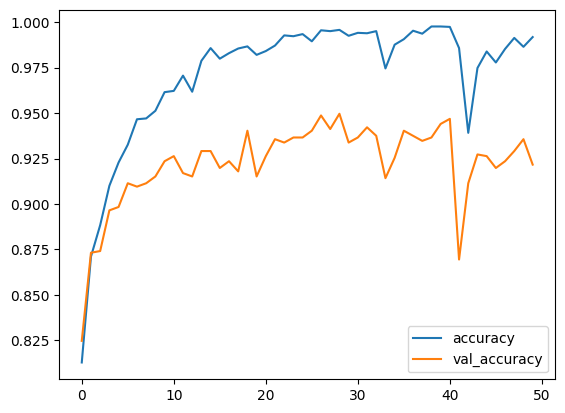

In [271]:
metrics[['accuracy', 'val_accuracy']].plot()

<Axes: >

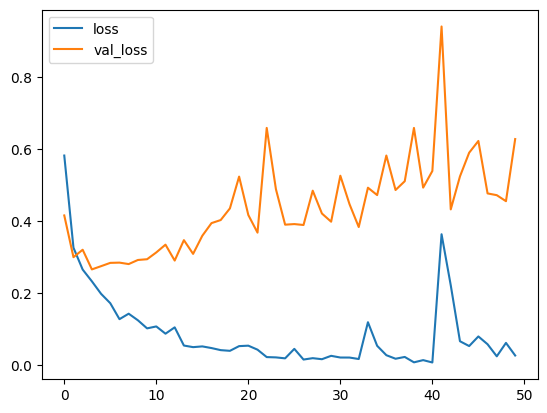

In [272]:
metrics[['loss','val_loss']].plot()

In [273]:
from tensorflow import keras
from tensorflow.keras.models import load_model

cnn_model = load_model('data/models/cnn_model.h5')

In [274]:
from sklearn.metrics import classification_report
import tensorflow as tf

tf.config.run_functions_eagerly(True)

# Assuming test_ds is a TensorFlow dataset
predictions = cnn_model.predict(test_ds, batch_size=32)
predicted_labels = np.argmax(predictions, axis=1)

true_labels = []
for _, label in test_ds:
    true_labels.extend(label.numpy())

print(classification_report(true_labels, predicted_labels, target_names=test_ds.class_names))


168/168 [==============================] - 50s 286ms/step
              precision    recall  f1-score   support

       Covid       0.04      0.03      0.04       144
      Normal       0.25      0.26      0.25      1341
   PNEUMONIA       0.72      0.72      0.72      3875

    accuracy                           0.58      5360
   macro avg       0.34      0.34      0.34      5360
weighted avg       0.59      0.58      0.58      5360



In [276]:
imgs, labels = next(train_gen)
img_tensor = imgs[0]
img_tensor.shape

(299, 299, 3)

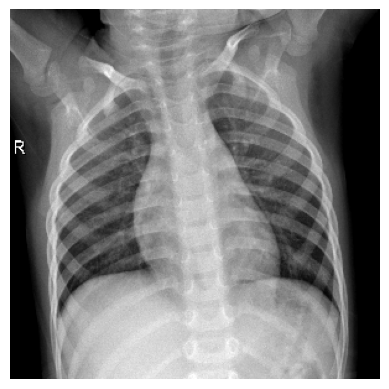

In [277]:
plt.axis("off")
plt.imshow(img_tensor)
plt.show()

In [ ]:
layer_outputs = [layer.output for layer in cnn_model.layers[:12]] # Extracts the outputs of the top 12 layers
activation_model = keras.Model(inputs=cnn_model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

Epoch 1/10


134/134 [==============================] - 258s 2s/step - loss: 0.0273 - accuracy: 0.9904 - val_loss: 0.1303 - val_accuracy: 0.9692
Epoch 2/10
134/134 [==============================] - 265s 2s/step - loss: 0.0170 - accuracy: 0.9942 - val_loss: 0.1438 - val_accuracy: 0.9636
Epoch 3/10
134/134 [==============================] - 264s 2s/step - loss: 0.0141 - accuracy: 0.9946 - val_loss: 0.1256 - val_accuracy: 0.9683
Epoch 4/10
134/134 [==============================] - 267s 2s/step - loss: 0.0096 - accuracy: 0.9972 - val_loss: 0.1670 - val_accuracy: 0.9590
Epoch 5/10
134/134 [==============================] - 270s 2s/step - loss: 0.0110 - accuracy: 0.9953 - val_loss: 0.1804 - val_accuracy: 0.9627
Epoch 6/10
134/134 [==============================] - 278s 2s/step - loss: 0.0254 - accuracy: 0.9911 - val_loss: 0.1400 - val_accuracy: 0.9683
Epoch 7/10
134/134 [==============================] - 276s 2s/step - loss: 0.0262 - accuracy: 0.9902 - val_loss: 0.1598 - val_accuracy: 0.9646
Epoch 8/10

<Figure size 640x480 with 0 Axes>

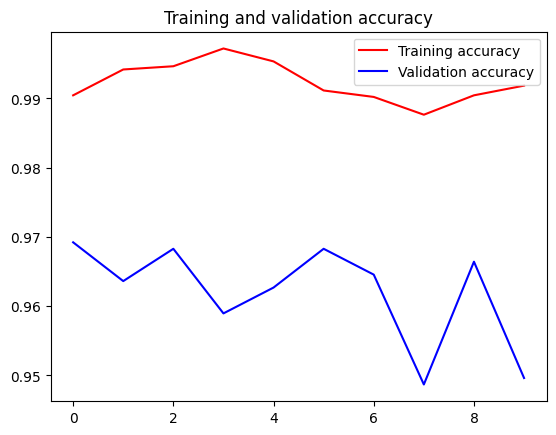

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
history=model.fit(train_ds,validation_data=val_ds,epochs=5)
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs,acc,'r',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


In [ ]:
from sklearn.metrics import classification_report


preds = model.predict(x=test_gen)
print(classification_report(y_true= test_gen.classes, y_pred=np.argmax(preds, axis=-1), digits=4,labels=[0,1], target_names=['Covid', 'Normal']))

3/3 [==============================] - 3s 519ms/step
              precision    recall  f1-score   support

       Covid     0.1852    0.9091    0.3077        11
      Normal     0.1143    0.3333    0.1702        12

   micro avg     0.1573    0.6087    0.2500        23
   macro avg     0.1497    0.6212    0.2390        23
weighted avg     0.1482    0.6087    0.2360        23



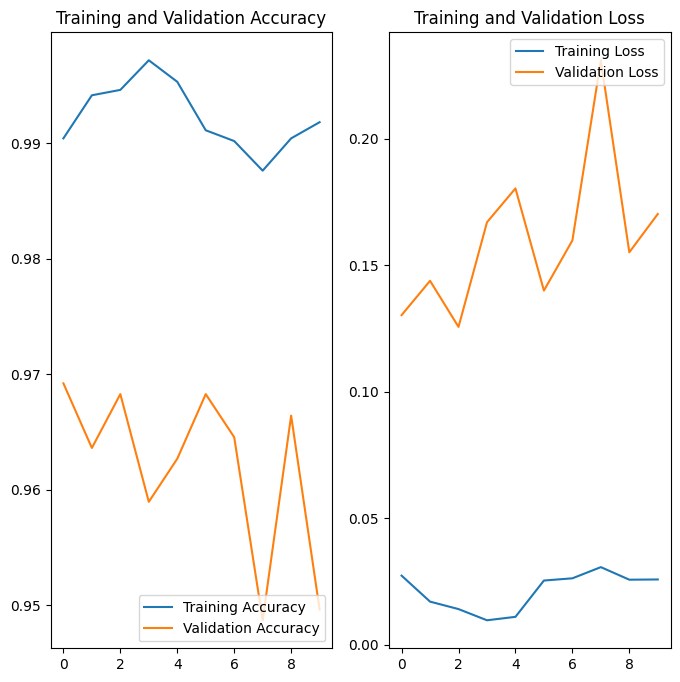

In [278]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(epochs))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [1]:
import os
import numpy as np
prediction_path="./dataset/Prediction/covid"
images =os.listdir(prediction_path)
for image in images[:10]:
    img = tf.keras.utils.load_img(
        os.path.join(prediction_path,image), target_size=(256,256)
    )
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    print(
        "This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(class_names[np.argmax(score)], 100 * np.max(score))
    )

NameError: name 'tf' is not defined

In [281]:
model.save('model.keras')


In [ ]:
# feature extraction

import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

def extract_features(image_path, model):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    x = tf.keras.preprocessing.image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = tf.keras.applications.resnet50.preprocess_input(x)
    feature = model.predict(x)[0]
    return feature

# Load the model only once
model = tf.keras.applications.resnet50.ResNet50(weights='imagenet', include_top=False, pooling='avg')

prediction_path = "./dataset/Prediction"
images = os.listdir(prediction_path)

# Create a mapping between filenames and labels
label_mapping = {'covid': 0, 'normal': 1, 'pneumonia': 2}

data = pd.DataFrame(columns=['image', 'feature', 'label'])

for image in images:
    label = None
    image_lower = image.lower()  # Convert the filename to lowercase for case-insensitivity
    if 'covid' in image_lower or 'sars' in image_lower:
        label = 'covid'
    elif 'normal' in image_lower:
        label = 'normal'
    elif 'pneumonia' in image_lower or 'virus' in image_lower:
        label = 'pneumonia'
    
    if label is not None:
        feature = extract_features(os.path.join(prediction_path, image), model)
        data.loc[len(data)] = [image, feature, label_mapping[label]]

data.to_csv('data.csv', index=False)

data = pd.read_csv('data.csv')
data['image'] = data['image'].apply(lambda x: os.path.join(prediction_path, x))
data['feature'] = data['feature'].apply(lambda x: np.fromstring(x[1:-1], sep=' ') if isinstance(x, str) else np.zeros(2048, dtype='float32'))

features = np.vstack(data['feature'].values)
labels = data['label'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training set
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)


1/1 [==============================] - 0s 335ms/step
Accuracy: 0.7647058823529411
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         3
           2       0.76      1.00      0.87        13

    accuracy                           0.76        17
   macro avg       0.25      0.33      0.29        17
weighted avg       0.58      0.76      0.66        17



C:\Users\amarn\AppData\Local\Temp\ipykernel_16472\1546412987.py:46: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  data['feature'] = data['feature'].apply(lambda x: np.fromstring(x[1:-1], sep=' ') if isinstance(x, str) else np.zeros(2048, dtype='float32'))
c:\Users\amarn\OneDrive\Desktop\final-major-project\test\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\amarn\OneDrive\Desktop\final-major-project\test\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

In [282]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

    
features = np.vstack(data['feature'].values)
labels = data['label'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.1, random_state=66)

# Create a random forest classifier
rf_classifier = RandomForestClassifier(random_state=66)

# Train the classifier on the training set
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)







Accuracy: 0.7777777777777778
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       0.88      0.88      0.88         8

    accuracy                           0.78         9
   macro avg       0.44      0.44      0.44         9
weighted avg       0.78      0.78      0.78         9



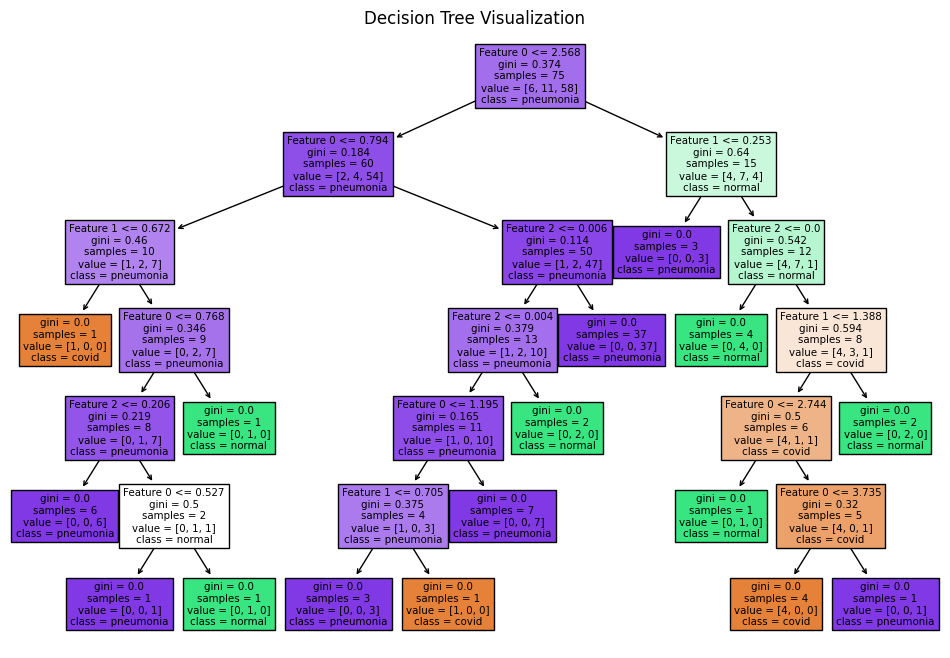

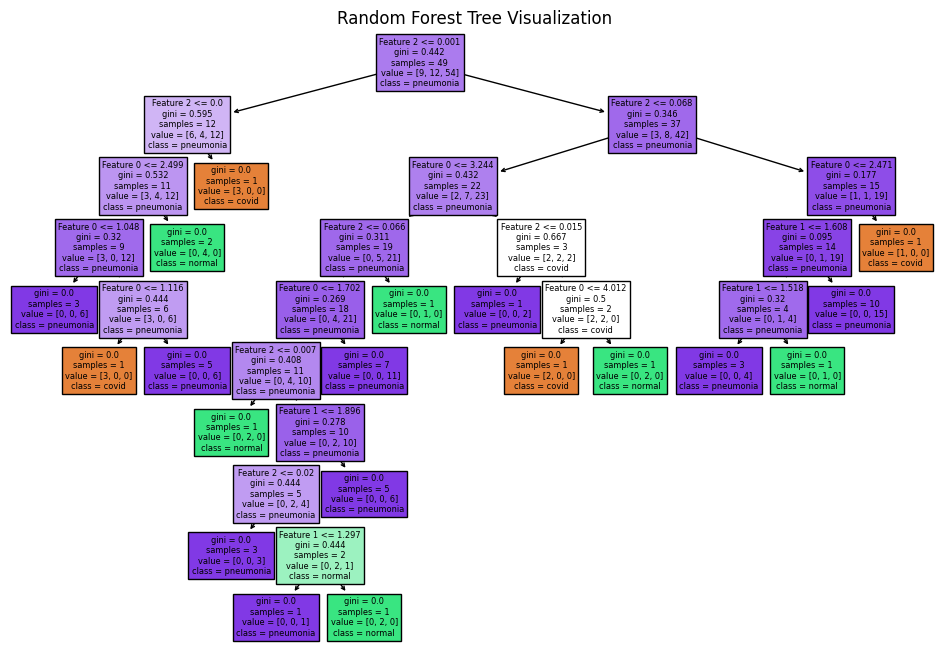

In [283]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Get class names from label_mapping
class_names = list(label_mapping.keys())

# Visualize Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, filled=True, feature_names=[f'Feature {i}' for i in range(features.shape[1])], class_names=class_names)
plt.title("Decision Tree Visualization")
plt.show()

# Visualize Random Forest (one tree from the forest)
plt.figure(figsize=(12, 8))
plot_tree(rf_classifier.estimators_[0], filled=True, feature_names=[f'Feature {i}' for i in range(features.shape[1])], class_names=class_names)
plt.title("Random Forest Tree Visualization")
plt.show()


c:\Users\amarn\OneDrive\Desktop\final-major-project\test\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


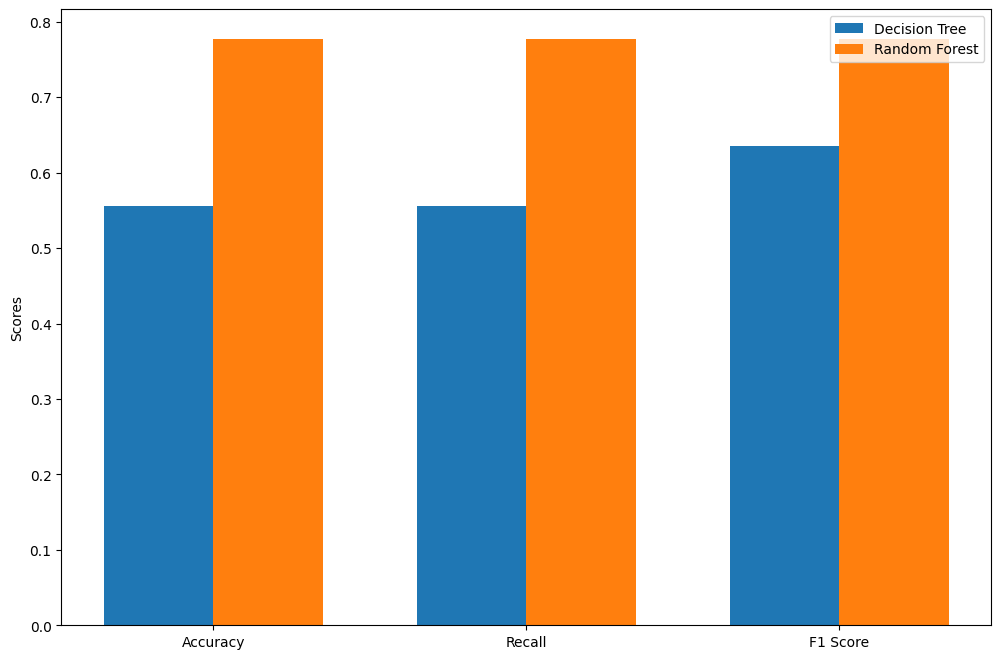

In [284]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

    
features = np.vstack(data['feature'].values)
labels = data['label'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.1, random_state=66)

# Create a random forest classifier
rf_classifier = RandomForestClassifier(random_state=66)

# Train the classifier on the training set
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)


# Evaluate the classifier
rf_accuracy = accuracy_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred, average='weighted')
rf_f1 = f1_score(y_test, y_pred, average='weighted')

# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=66)

# Train the classifier on the training set
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the classifier
dt_accuracy = accuracy_score(y_test, y_pred)
dt_recall = recall_score(y_test, y_pred, average='weighted')
dt_f1 = f1_score(y_test, y_pred, average='weighted')

# Plot the bar graphs


labels = ['Accuracy', 'Recall', 'F1 Score']
dt_scores = [dt_accuracy, dt_recall, dt_f1]
rf_scores = [rf_accuracy, rf_recall, rf_f1]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

# Plot the bar graphs
fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width/2, dt_scores, width, label='Decision Tree')
rects2 = ax.bar(x + width/2, rf_scores, width, label='Random Forest')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()




C:\Users\amarn\AppData\Local\Temp\ipykernel_16472\197213917.py:3: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  data['feature'] = data['feature'].apply(lambda x: np.fromstring(x[1:-1], sep=' ') if isinstance(x, str) else np.zeros(2048, dtype='float32'))
c:\Users\amarn\OneDrive\Desktop\final-major-project\test\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\amarn\OneDrive\Desktop\final-major-project\test\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\User

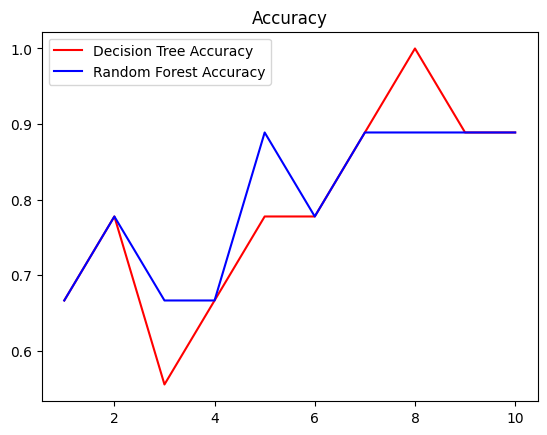

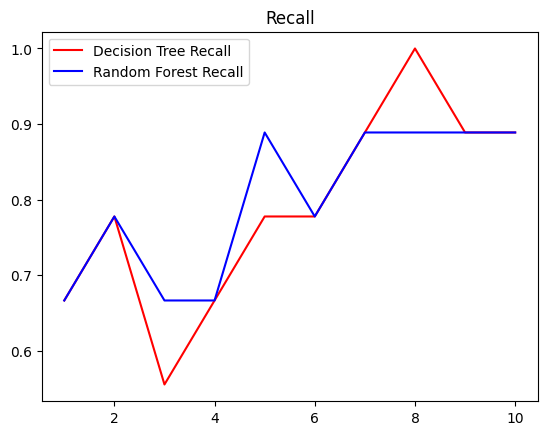

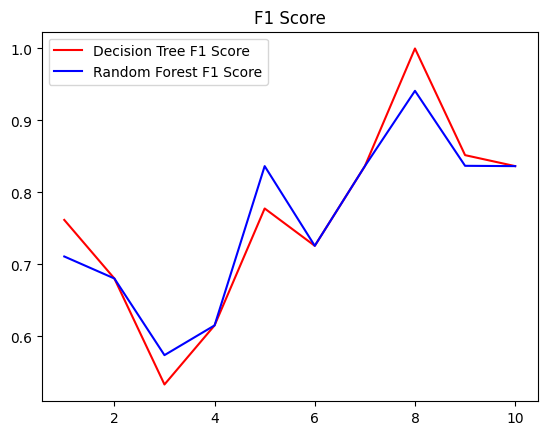

<Figure size 640x480 with 0 Axes>

In [285]:
data = pd.read_csv('data.csv')
data['image'] = data['image'].apply(lambda x: os.path.join(prediction_path, x))
data['feature'] = data['feature'].apply(lambda x: np.fromstring(x[1:-1], sep=' ') if isinstance(x, str) else np.zeros(2048, dtype='float32'))

accuracy_dt_list , recall_dt_list , f1_dt_list = [],[],[]
accuracy_rf_list , recall_rf_list , f1_rf_list = [],[],[]

for i in range(10):
    features = np.vstack(data['feature'].values)
    labels = data['label'].values

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.1, random_state=i)

    # Create a random forest classifier
    rf_classifier = RandomForestClassifier(random_state=i)
    
    # Train the classifier on the training set
    rf_classifier.fit(X_train, y_train)
    
    # Make predictions on the test set

    y_pred = rf_classifier.predict(X_test)

    # Evaluate the classifier
    rf_accuracy = accuracy_score(y_test, y_pred)
    rf_recall = recall_score(y_test, y_pred, average='weighted')
    rf_f1 = f1_score(y_test, y_pred, average='weighted')

    # Create a decision tree classifier
    dt_classifier = DecisionTreeClassifier(random_state=i)

    # Train the classifier on the training set
    dt_classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = dt_classifier.predict(X_test)

    # Evaluate the classifier
    dt_accuracy = accuracy_score(y_test, y_pred)
    dt_recall = recall_score(y_test, y_pred, average='weighted')
    dt_f1 = f1_score(y_test, y_pred, average='weighted')

    accuracy_dt_list.append(dt_accuracy)
    recall_dt_list.append(dt_recall)
    f1_dt_list.append(dt_f1)

    accuracy_rSSf_list.append(rf_accuracy)
    recall_rf_list.append(rf_recall)

    f1_rf_list.append(rf_f1)
    
epochs = range(1,11)
plt.plot(epochs,accuracy_dt_list,'r',label='Decision Tree Accuracy')
plt.plot(epochs,accuracy_rf_list,'b',label='Random Forest Accuracy')
plt.title('Accuracy')
plt.legend(loc=0)
plt.figure()
plt.plot(epochs,recall_dt_list,'r',label='Decision Tree Recall')
plt.plot(epochs,recall_rf_list,'b',label='Random Forest Recall')
plt.title('Recall')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs,f1_dt_list,'r',label='Decision Tree F1 Score')
plt.plot(epochs,f1_rf_list,'b',label='Random Forest F1 Score')
plt.title('F1 Score')

plt.legend(loc=0)
plt.figure()

plt.show()




In [ ]:
cnn_model = tf.keras.models.load_model('model.keras')


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)       

In [286]:
from sklearn.model_selection import train_test_split

# Assuming data is a DataFrame or NumPy array with features and labels
# X contains features, and y contains labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [287]:
svc = svm.SVC(probability=True,random_state=0)

param_grid = {
    'C':[1,10,100],
    'gamma': [0.1,0.01,0.001],
    'kernel': ['rbf', 'poly', 'linear']
}
svc_grid = GridSearchCV(svc, param_grid, cv=5, verbose=3, n_jobs=-1)
svc_grid.fit(X_train, y_train)

print(svc_grid.best_params_)
print(svc_grid.best_estimator_)

svc_grid_predictions = svc_grid.predict(X_test)
print(classification_report(y_test, svc_grid_predictions))

svc_grid_accuracy = accuracy_score(y_test, svc_grid_predictions)
svc_grid_recall = recall_score(y_test, svc_grid_predictions, average='weighted')
svc_grid_f1 = f1_score(y_test, svc_grid_predictions, average='weighted')

print(f"Accuracy: {svc_grid_accuracy}")
print(f"Recall: {svc_grid_recall}")
print(f"F1 Score: {svc_grid_f1}")



Fitting 5 folds for each of 27 candidates, totalling 135 fits


{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1, probability=True, random_state=0)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         1

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

Accuracy: 1.0
Recall: 1.0
F1 Score: 1.0


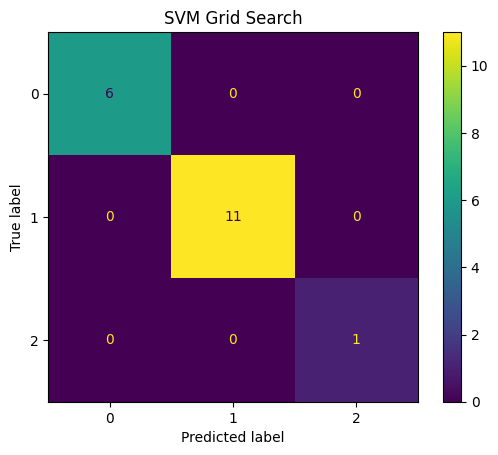

In [304]:
cm = confusion_matrix(y_test, svc_grid_predictions)
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.title("SVM Grid Search")
plt.show()



In [307]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


ab = AdaBoostClassifier(random_state=0)

param_grid = {'n_estimators': np.arange(50,100, 10)}
ab_clf = GridSearchCV(ab, param_grid, cv=5, verbose=3, n_jobs=-1)

ab_clf.fit(X_train, y_train)

preds = ab_clf.predict(X_test)
print(classification_report(y_test, preds,digits=4, labels=[1,0], target_names=['Covid', 'Normal']))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


              precision    recall  f1-score   support

       Covid     1.0000    1.0000    1.0000        11
      Normal     1.0000    1.0000    1.0000         6

   micro avg     1.0000    1.0000    1.0000        17
   macro avg     1.0000    1.0000    1.0000        17
weighted avg     1.0000    1.0000    1.0000        17



In [310]:
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
from sklearn import svm
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier

vcf = VotingClassifier(estimators=[
        ('dt', tree.DecisionTreeClassifier(criterion= 'gini', max_depth= 10, max_leaf_nodes=7, min_samples_leaf= 2,max_features=4, random_state=0)), 
        ('rf', RandomForestClassifier(criterion= 'entropy', max_depth= 20, min_samples_split= 20, n_estimators=99, random_state=0)), 
        ('svc', svm.SVC(C= 100, gamma= 0.1, kernel= 'poly',probability=True, random_state=0)), 
        ('ab', AdaBoostClassifier(n_estimators=70, random_state=0))
      ])

params = {'voting':['soft'], 'weights':[[1,4,3,1],[1,3,2,1],[1,3,4,1],[1,3,3,2]]}
vcf_grid = GridSearchCV(vcf, params, cv=5, verbose=3, n_jobs=-1)
vcf_grid.fit(X_train, y_train)


print(classification_report(y_test, e_preds, digits=4, labels=[1,0], target_names=['Covid', 'Normal']))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


              precision    recall  f1-score   support

       Covid     1.0000    1.0000    1.0000        11
      Normal     1.0000    1.0000    1.0000         6

   micro avg     1.0000    1.0000    1.0000        17
   macro avg     1.0000    1.0000    1.0000        17
weighted avg     1.0000    1.0000    1.0000        17

